In [1]:
from mplsoccer import VerticalPitch, FontManager, Sbopen
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsbombpy import sb


{'GK': <Axes: label='inset_axes'>,
 'RB': <Axes: label='inset_axes'>,
 'RCB': <Axes: label='inset_axes'>,
 'CB': <Axes: label='inset_axes'>,
 'LCB': <Axes: label='inset_axes'>,
 'LB': <Axes: label='inset_axes'>,
 'CDM': <Axes: label='inset_axes'>,
 'RCM': <Axes: label='inset_axes'>,
 'LCM': <Axes: label='inset_axes'>}

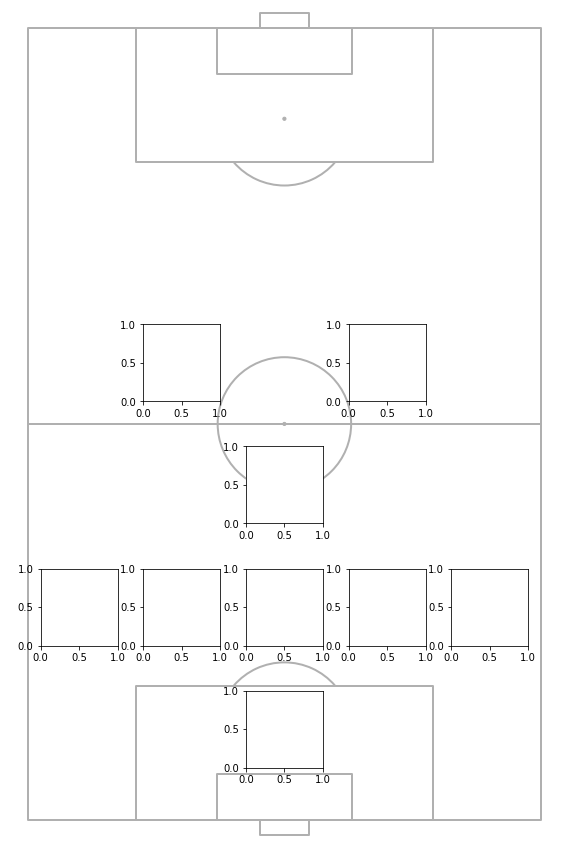

In [8]:
pitch = VerticalPitch(goal_type='box', pitch_type='opta')
fig, ax = pitch.draw(figsize=(8, 14))

pitch.formation('53', ax=ax, kind='axes', height=15, aspect=1)

In [4]:
pitch.formations

['442',
 '41212',
 '433',
 '451',
 '4411',
 '4141',
 '4231',
 '4321',
 '532',
 '541',
 '352',
 '343',
 '31312',
 '4222',
 '3511',
 '3421',
 '3412',
 '3142',
 '31213',
 '4132',
 '424',
 '4312',
 '3241',
 '3331',
 'pyramid',
 'metodo',
 'wm',
 '41221',
 '42211',
 '32221',
 '5221',
 '3232',
 '312112',
 '42121',
 '31222',
 '4213',
 '32122',
 '41131',
 '432',
 '441',
 '4311',
 '4221',
 '4131',
 '4212',
 '342',
 '3411',
 '351',
 '531',
 '431',
 '44',
 '422',
 '341',
 '53']

In [11]:
posiciones_dataframe = pitch.formations_dataframe
posiciones_dataframe[posiciones_dataframe['formation'] == '433']

,name,statsbomb,opta,wyscout,x,y,x_flip,y_flip,x_half,y_half,x_half_flip,y_half_flip,formation
0,GK,[1],1,gk,11.5,50.0,88.5,50.0,2.90,50.0,97.10,50.0,433
1,RB,[2],2,rb,26.9,12.5,73.1,87.5,11.16,12.5,88.84,87.5,433
2,RCB,[3],5,rcb,26.9,37.5,73.1,62.5,11.16,37.5,88.84,62.5,433
3,LCB,[5],6,lcb,26.9,62.5,73.1,37.5,11.16,62.5,88.84,37.5,433
4,LB,[6],3,lb,26.9,87.5,73.1,12.5,11.16,87.5,88.84,12.5,433
5,CDM,"[10, 14]",4,dmf,42.3,50.0,57.7,50.0,19.42,50.0,80.58,50.0,433
6,RCM,"[13, 12, 9]",7,rcmf3,57.7,30.0,42.3,70.0,27.68,30.0,72.32,70.0,433
7,LCM,"[15, 16, 11]",8,lcmf3,57.7,70.0,42.3,30.0,27.68,70.0,72.32,30.0,433
8,RW,"[17, 22]",10,rwf,73.1,10.0,26.9,90.0,35.94,10.0,64.06,90.0,433
9,LW,"[21, 24]",11,lwf,73.1,90.0,26.9,10.0,35.94,90.0,64.06,10.0,433


In [65]:
def get_ids_nombres(formacion):
    nombres_posiciones = list(posiciones_dataframe[posiciones_dataframe['formation'] == formacion].name)
    ids_posiciones = list(posiciones_dataframe[posiciones_dataframe['formation'] == formacion].opta)
    return nombres_posiciones, ids_posiciones

In [60]:
get_ids_nombres('433')

(['GK', 'RB', 'RCB', 'LCB', 'LB', 'CDM', 'RCM', 'LCM', 'RW', 'LW', 'ST'],
 [[1],
  [2],
  [3],
  [5],
  [6],
  [10, 14],
  [13, 12, 9],
  [15, 16, 11],
  [17, 22],
  [21, 24],
  [23, 25, 19]])

In [2]:
parser = Sbopen()
partido = parser.event(3869685)

C:\Users\Federico Rábanos\AppData\Roaming\Python\Python39\site-packages\mplsoccer\statsbomb.py:509: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['433' '4231' '4231' '4231' '442' '442' '433' '352' '352']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'tactics_formation'] = df.loc[mask, 'tactics_formation'].astype(int).astype(str)


In [3]:
formacion_argentina = partido[3].iloc[:11]
formacion_argentina.position_id

0      1
1      2
2      3
3      5
4      6
5     10
6     13
7     15
8     17
9     21
10    23
Name: position_id, dtype: int64

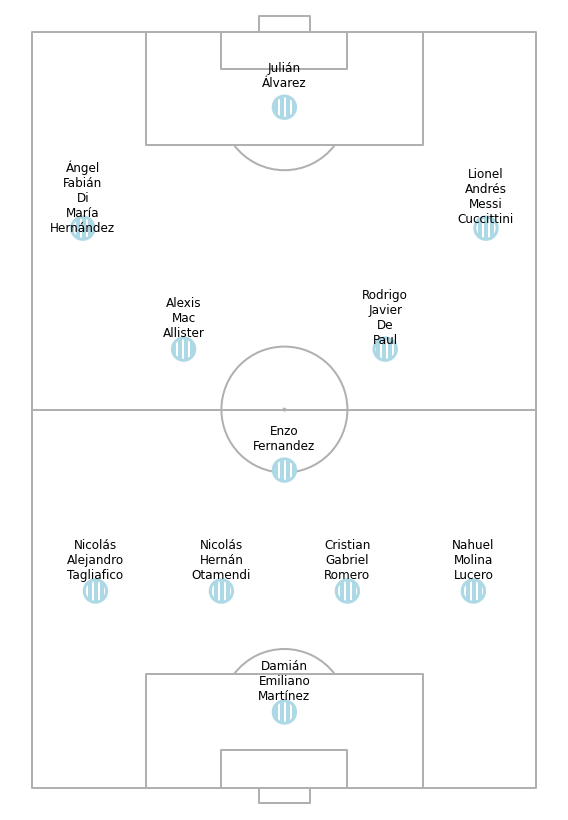

In [6]:
pitch = VerticalPitch(goal_type='box', pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(8, 14))
formation = '433'
mpl.rcParams['hatch.linewidth'] = 2
mpl.rcParams['hatch.color'] = 'white'
pitch.formation(formation, ax=ax, positions=formacion_argentina.position_id, kind='scatter', s=500, c='lightblue', hatch='||', linewidth=3)
pitch.formation(formation, kind='text', positions=formacion_argentina.position_id, text=formacion_argentina.player_name.str.replace(' ', '\n'), ax=ax, va='center', ha='center', fontsize=12, xoffset=5)

plt.savefig('/Users/Federico Rábanos/Downloads/foto formaciones.png', bbox_inches='tight', dpi=300, transparent=True)

In [62]:
df = pd.read_csv("../eventos LPF2023.csv")

<ipython-input-62-b2a5f9b5464a>:1: DtypeWarning: Columns (25,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../eventos LPF2023.csv")


In [66]:
get_ids_nombres('433')

(['GK', 'RB', 'RCB', 'LCB', 'LB', 'CDM', 'RCM', 'LCM', 'RW', 'LW', 'ST'],
 [1, 2, 5, 6, 3, 4, 7, 8, 10, 11, 9])

In [68]:
#Orden para el 433: Arquero, 4, central der, central izq, 3, centro der, 5, centro izq, extremo der, 9, extremo izq
jugadores_11 = [
    'Augusto Batalla',
    'Kevin Mac Allister',
    'Leandro González Pírez',
    'Cristian Lema',
    'Malcom Braida',
    'Ignacio Miramón',
    'Rodrigo Aliendro',
    'Nahuel Barrios',
    'Rodrigo Garro',
    'Lucas Beltrán',
    'Michael Santos'
]

positions, positions_ids = get_ids_nombres('433')

jugadores = pd.DataFrame({
    'position': positions,
    'position_id': positions_ids,
    'player': jugadores_11
})



In [69]:
#Creo los dfs de eventos para armar el mejor 11
eventos_11 = df[df['jugador'].isin(jugadores_11)]
eventos_11 = eventos_11.merge(jugadores,left_on='jugador', right_on='player')

In [70]:
eventos_11.head()

,Unnamed: 0.2,Unnamed: 0,eventId,minute,second,teamId,x,y,expandedMinute,value,...,marcador_eqlocal_shift,marcador_eqvis_shift,dif eqlocal,dif eqvis,progressive,entrada_area,en_area,position,position_id,player
0,23,23,194.0,0.0,49.0,907,36.0,43.9,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,RB,2,Kevin Mac Allister
1,44,44,14.0,1.0,18.0,907,56.8,6.2,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,RB,2,Kevin Mac Allister
2,46,46,16.0,1.0,45.0,907,86.7,0.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,RB,2,Kevin Mac Allister
3,63,63,25.0,2.0,45.0,907,17.8,5.6,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,RB,2,Kevin Mac Allister
4,70,70,30.0,3.0,12.0,907,16.9,3.5,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,RB,2,Kevin Mac Allister


c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1218: FutureWarning: 

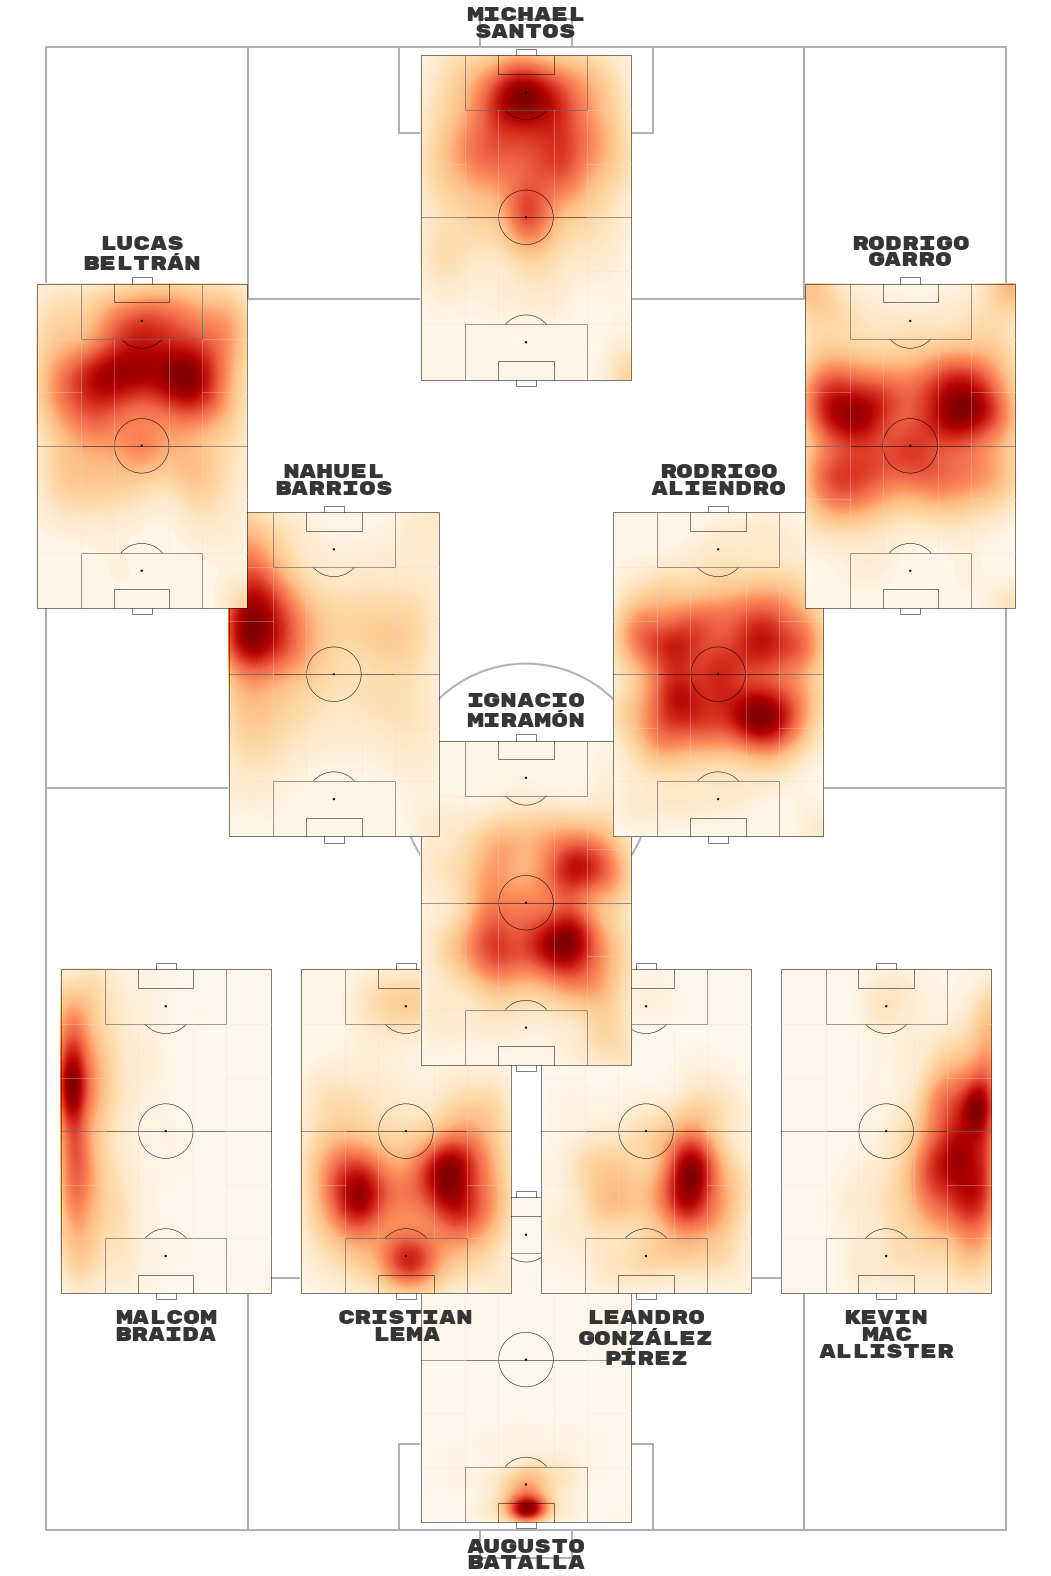

In [76]:
pitch = VerticalPitch(goal_type='box', pitch_type='opta')
fig, ax = pitch.draw(figsize=(15, 22))
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

pitch_ax = pitch.formation('433',
                           kind='pitch', #Asi en cada posición me arma una cancha
                           width=23,
                           positions=jugadores['position_id'], #Saco los ids del DataFrame que puse arriba, si no es 433, habria que tener otros.
                           ax=ax,
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3,
                           )

# adding kdeplot and player titles. Armo un loop que agarra cada posición y les crea una visualización
for position in pitch_ax:
    player_name = jugadores[jugadores['position_id'] == position].player.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    if position in [3, 6, 5, 2, 1]: #Para poner texto abajo o arriba así se ve mejor.
        pitch.text(-5, 50, player_name, va='top', ha='center', fontsize=20, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    else:
        pitch.text(115, 50, player_name, va='top', ha='center', fontsize=20, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=eventos_11.loc[eventos_11['position_id'] == position, 'x'],
                  y=eventos_11.loc[eventos_11['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='OrRd', thresh=0, ax=pitch_ax[position])